### 1. Exploratory Data Analysis

In [146]:
import nltk
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.probability import FreqDist

In [21]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/student/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/student/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
df = pd.read_csv(r"/Users/student/Desktop/tweets.csv", encoding='latin1')[:500]

/var/folders/_y/pcvsss7s0bg4vyt61wvz8j040000gn/T/ipykernel_1242/4151198865.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"/Users/student/Desktop/tweets.csv", encoding='latin1')[:500]


In [12]:
df

,user_name,text,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source
0,Bohmle,"#GPT4 for FREE. \nNo its not a clickbait, @Qol...",Carkingga,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,AI enthusiast,2019-07-03 03:44:41+00:00,60.0,349.0,611,False,2023-05-17 18:11:12+00:00,"['GPT4', 'ChatGPT4']",Twitter Web App,NaN,NaN
2,Dan Bruno AI,ChatGPT Thinks These 5 Crypto Coins Will Explo...,"Manchester, NH","The latest in #ChatGPT, #BARD, #Bing, and othe...",2021-05-19 01:19:32+00:00,470.0,157.0,5185,False,2023-05-17 18:11:03+00:00,"['chatgpt', 'AI', 'openAI']",dlvr.it
3,Georgiana Comsa,New: @JWVance's post about 5 #startups (includ...,Palo Alto,"Founder of Silicon Valley PR, award-winning PR...",2008-12-24 09:32:23+00:00,3864.0,1883.0,2415,False,2023-05-17 18:10:25+00:00,"['startups', 'startup50']",Twitter Web App
4,Bitone Great,ð¨Get Out!ð¨\nð°#Binance Spotð°\nâ¬ R...,Hong Kong,#ChatGPT (AI) powered Free Trading Signal! \nL...,2022-11-21 04:42:18+00:00,1517.0,506.0,64,False,2023-05-17 18:09:39+00:00,"['Binance', 'Short', 'GHSTUSDT']",rsi1
...,...,...,...,...,...,...,...,...,...,...,...,...
495,O'Dwyer's PR News,#ChatGPT set off an endless stream of fear and...,"New York, NY","The #1 news outlet for public relations, publi...",2009-02-25 15:50:27+00:00,15013.0,2876.0,1,False,2023-05-17 16:00:37+00:00,['ChatGPT'],Twitter Web App
496,"Tracy Krauss, #author #artist #playwright",ChatGPT is a hot topic; there is no doubt. It ...,"British Columbia, Canada",I write modern Christian romance with a twist ...,2010-06-19 04:45:43+00:00,2718.0,1803.0,348,False,2023-05-17 16:00:37+00:00,NaN,Hootsuite Inc.
497,Tom Solid,Exciting news! #chatGPT has launched its Plugi...,Germany,ðâ¨ We help you to build your productivity...,2010-12-04 11:00:53+00:00,3460.0,332.0,4464,False,2023-05-17 16:00:30+00:00,['chatGPT'],Hootsuite Inc.
498,Tweeting Monk,@Oncrawl Agreed! The #ChatGPT is definitely th...,GET 30% OFF FOR 3 MONTHS,Set your Twitter account on auto-pilot and wat...,2022-03-30 10:35:13+00:00,50.0,111.0,64,False,2023-05-17 16:00:28+00:00,['ChatGPT'],TweetingMonk


In [13]:
df.drop('user_created', axis=1, inplace=True)
df.drop('user_followers', axis=1, inplace=True)
df.drop('user_friends', axis=1, inplace=True)
df.drop('user_favourites', axis=1, inplace=True)
df = df[~df['text'].isnull()]

In [33]:
df

,user_name,text,user_location,user_description,user_verified,date,hashtags,source
0,Bohmle,"#GPT4 for FREE. \nNo its not a clickbait, @Qol...",Carkingga,NaN,NaN,NaN,NaN,NaN
1,NaN,AI enthusiast,2019-07-03 03:44:41+00:00,60.0,"['GPT4', 'ChatGPT4']",Twitter Web App,NaN,NaN
2,Dan Bruno AI,ChatGPT Thinks These 5 Crypto Coins Will Explo...,"Manchester, NH","The latest in #ChatGPT, #BARD, #Bing, and othe...",False,2023-05-17 18:11:03+00:00,"['chatgpt', 'AI', 'openAI']",dlvr.it
3,Georgiana Comsa,New: @JWVance's post about 5 #startups (includ...,Palo Alto,"Founder of Silicon Valley PR, award-winning PR...",False,2023-05-17 18:10:25+00:00,"['startups', 'startup50']",Twitter Web App
4,Bitone Great,ð¨Get Out!ð¨\nð°#Binance Spotð°\nâ¬ R...,Hong Kong,#ChatGPT (AI) powered Free Trading Signal! \nL...,False,2023-05-17 18:09:39+00:00,"['Binance', 'Short', 'GHSTUSDT']",rsi1
...,...,...,...,...,...,...,...,...
495,O'Dwyer's PR News,#ChatGPT set off an endless stream of fear and...,"New York, NY","The #1 news outlet for public relations, publi...",False,2023-05-17 16:00:37+00:00,['ChatGPT'],Twitter Web App
496,"Tracy Krauss, #author #artist #playwright",ChatGPT is a hot topic; there is no doubt. It ...,"British Columbia, Canada",I write modern Christian romance with a twist ...,False,2023-05-17 16:00:37+00:00,NaN,Hootsuite Inc.
497,Tom Solid,Exciting news! #chatGPT has launched its Plugi...,Germany,ðâ¨ We help you to build your productivity...,False,2023-05-17 16:00:30+00:00,['chatGPT'],Hootsuite Inc.
498,Tweeting Monk,@Oncrawl Agreed! The #ChatGPT is definitely th...,GET 30% OFF FOR 3 MONTHS,Set your Twitter account on auto-pilot and wat...,False,2023-05-17 16:00:28+00:00,['ChatGPT'],TweetingMonk


In [357]:
text_raw = df.iloc[:, 1]
text_raw

0      ['gpt4', 'for', 'free', 'no', 'its', 'not', 'a...
1                                   ['ai', 'enthusiast']
2      ['chatgpt', 'thinks', 'these', '5', 'crypto', ...
3      ['new', 'jwvance', 's', 'post', 'about', '5', ...
4      ['ð', 'get', 'out', 'ð', 'ð', 'binance', 'spot...
                             ...                        
495    ['chatgpt', 'set', 'off', 'an', 'endless', 'st...
496    ['chatgpt', 'is', 'a', 'hot', 'topic', 'there'...
497    ['exciting', 'news', 'chatgpt', 'has', 'launch...
498    ['oncrawl', 'agreed', 'the', 'chatgpt', 'is', ...
499    ['do', 'you', 'agree', 'whatever', 'is', 'put'...
Name: text, Length: 500, dtype: object

In [142]:
regexp = RegexpTokenizer('\w+')

df['text']=df['text'].apply(regexp.tokenize)
df.head(3)

,user_name,text,user_location,user_description,user_verified,date,hashtags,source,text_token
0,Bohmle,"[GPT4, for, FREE, No, its, not, a, clickbait, ...",Carkingga,NaN,NaN,NaN,NaN,NaN,"[GPT4, for, FREE, No, its, not, a, clickbait, ..."
1,NaN,"[AI, enthusiast]",2019-07-03 03:44:41+00:00,60.0,"['GPT4', 'ChatGPT4']",Twitter Web App,NaN,NaN,"[AI, enthusiast]"
2,Dan Bruno AI,"[ChatGPT, Thinks, These, 5, Crypto, Coins, Wil...","Manchester, NH","The latest in #ChatGPT, #BARD, #Bing, and othe...",False,2023-05-17 18:11:03+00:00,"['chatgpt', 'AI', 'openAI']",dlvr.it,"[ChatGPT, Thinks, These, 5, Crypto, Coins, Wil..."


In [39]:
file = open(r"/Users/student/Desktop/tweets.csv")

In [45]:
read_data = file.read(500)

In [46]:
read_data

'user_name,text,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source\nBohmle,"#GPT4 for FREE. \nNo its not a clickbait, @Qolaba Studio now has a chatbot powered by #ChatGPT4 offering #ChatGPTplus for FREE to use along with #AIart generator which allows you a 1-click #NFT #minting to make the most of your #AIArtwork \n#NFTs #OpenAI #OpenAIChatGPT  #chatgpt",Carkingga\n,AI enthusiast,2019-07-03 03:44:41+00:00,60.0,349.0,611,False,202'

In [150]:
tokenized_words = nltk.tokenize.word_tokenize(read_data)
fdist = FreqDist(tokenized_words)
fdist

FreqDist({',': 16, '#': 11, 'a': 3, "''": 2, 'for': 2, 'FREE': 2, 'to': 2, 'user_name': 1, 'text': 1, 'user_location': 1, ...})

### 2. Pre-processing And Cleaning

In [345]:
# Step 1: Preprocess the text data

def preprocess_text(text):

    # Convert text to lowercase
    text = text.lower()

    # Word Tokenization
    words = word_tokenize(text)
    #print("Words:", words)

    # Filtration
    filtered_words = [word for word in words if word.isalpha()]
    print("Filtered Words:", filtered_words)
    
    # Remove special characters and punctuation
    text = re.sub(r'[^\w\s]', '', text)
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|pic.twitter\S+', '', text)
    
    # Remove special characters and symbols
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
    
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Stemming
    ps = PorterStemmer()
    stemmed_words = [ps.stem(word) for word in filtered_words]
    print("Stemmed Words:", stemmed_words)
    
    # Lemmatize the words
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Step 8: Remove common words (optional)
    common_words = ['covid19', 'coronavirus', 'vaccine']  # Add more words to the list if needed
    filtered_tokens = [token for token in tokens if token.lower() not in common_words]
    
    filtered_tweet = ' '.join(filtered_tokens)
    
    return filtered_tweet

    #return cleaned_text

In [346]:
#preprocess_text(df['text'])

In [347]:
clean_data = preprocess_text(read_data)

Filtered Words: ['text', 'date', 'hashtags', 'source', 'bohmle', 'for', 'free', 'no', 'its', 'not', 'a', 'clickbait', 'qolaba', 'studio', 'now', 'has', 'a', 'chatbot', 'powered', 'by', 'offering', 'chatgptplus', 'for', 'free', 'to', 'use', 'along', 'with', 'aiart', 'generator', 'which', 'allows', 'you', 'a', 'nft', 'minting', 'to', 'make', 'the', 'most', 'of', 'your', 'aiartwork', 'nfts', 'openai', 'openaichatgpt', 'chatgpt', 'carkingga', 'ai']
Stemmed Words: ['text', 'date', 'hashtag', 'sourc', 'bohml', 'for', 'free', 'no', 'it', 'not', 'a', 'clickbait', 'qolaba', 'studio', 'now', 'ha', 'a', 'chatbot', 'power', 'by', 'offer', 'chatgptplu', 'for', 'free', 'to', 'use', 'along', 'with', 'aiart', 'gener', 'which', 'allow', 'you', 'a', 'nft', 'mint', 'to', 'make', 'the', 'most', 'of', 'your', 'aiartwork', 'nft', 'openai', 'openaichatgpt', 'chatgpt', 'carkingga', 'ai']


In [348]:
clean_data

'usernametextuserlocationuserdescriptionusercreateduserfollowersuserfriendsuserfavouritesuserverifieddatehashtagssource bohmlegpt free clickbait qolaba studio chatbot powered chatgpt offering chatgptplus free use along aiart generator allows click nft minting make aiartwork nfts openai openaichatgpt chatgptcarkingga ai enthusiast false'

In [349]:
def preprocess_df(text):
    
    df['text'] = df['text'].astype(str).str.lower()
    
    from nltk.tokenize import RegexpTokenizer

    regexp = RegexpTokenizer('\w+')

    df['text_token']=df['text'].apply(regexp.tokenize)
    
    from nltk.corpus import stopwords

    # Make a list of english stopwords
    stopwords = nltk.corpus.stopwords.words("english")

    # Extend the list with your own custom stopwords
    my_stopwords = ['https']
    stopwords.extend(my_stopwords)
    
    # Remove stopwords
    df['text_token'] = df['text_token'].apply(lambda x: [item for item in x if item not in stopwords])

    #Remove infrequent words
    df['text_string'] = df['text_token'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))
    
    all_words = ' '.join([word for word in df['text_string']])
    
    tokenized_words = nltk.tokenize.word_tokenize(all_words)
    
    return tokenized_words

In [350]:
preprocess_df(df['text'])

['gpt4',
 'free',
 'clickbait',
 'qolaba',
 'studio',
 'chatbot',
 'powered',
 'chatgpt4',
 'offering',
 'chatgptplus',
 'free',
 'use',
 'along',
 'aiart',
 'generator',
 'allows',
 'click',
 'nft',
 'minting',
 'make',
 'aiartwork',
 'nfts',
 'openai',
 'openaichatgpt',
 'chatgpt',
 'enthusiast',
 'chatgpt',
 'thinks',
 'crypto',
 'coins',
 'explode',
 'year',
 'yahoo',
 'finance',
 'chatgpt',
 'openai',
 'tfodu0qndz',
 'new',
 'jwvance',
 'post',
 'startups',
 'including',
 'vcinityinc',
 '1st',
 'startup50',
 'challenge',
 'thx',
 'chatgpt',
 'based',
 'answers',
 'macro',
 'economic',
 'pressures',
 'funding',
 'track',
 'record',
 'management',
 'team',
 'amp',
 'growth',
 'potential',
 'market',
 'sector',
 'jxg37amjh5',
 'get',
 'binance',
 'spotð',
 'recommendation',
 'short',
 'ticker',
 'ghstusdt',
 'time',
 'interval',
 '5min',
 'last',
 'price',
 '956',
 'rsi',
 'powered',
 'chatgpt',
 'ghst',
 'ghst',
 'alphaquarktoken',
 'gon',
 'na',
 'long',
 'wait',
 'short',
 'qiqgtt

In [154]:
df

,user_name,text,user_location,user_description,user_verified,date,hashtags,source,text_token,text_string
0,Bohmle,"['gpt4', 'for', 'free', 'no', 'its', 'not', 'a...",Carkingga,NaN,NaN,NaN,NaN,NaN,"[gpt4, free, clickbait, qolaba, studio, chatbo...",gpt4 free clickbait qolaba studio chatbot powe...
1,NaN,"['ai', 'enthusiast']",2019-07-03 03:44:41+00:00,60.0,"['GPT4', 'ChatGPT4']",Twitter Web App,NaN,NaN,"[ai, enthusiast]",enthusiast
2,Dan Bruno AI,"['chatgpt', 'thinks', 'these', '5', 'crypto', ...","Manchester, NH","The latest in #ChatGPT, #BARD, #Bing, and othe...",False,2023-05-17 18:11:03+00:00,"['chatgpt', 'AI', 'openAI']",dlvr.it,"[chatgpt, thinks, 5, crypto, coins, explode, y...",chatgpt thinks crypto coins explode year yahoo...
3,Georgiana Comsa,"['new', 'jwvance', 's', 'post', 'about', '5', ...",Palo Alto,"Founder of Silicon Valley PR, award-winning PR...",False,2023-05-17 18:10:25+00:00,"['startups', 'startup50']",Twitter Web App,"[new, jwvance, post, 5, startups, including, v...",new jwvance post startups including vcinityinc...
4,Bitone Great,"['ð', 'get', 'out', 'ð', 'ð', 'binance', 'spot...",Hong Kong,#ChatGPT (AI) powered Free Trading Signal! \nL...,False,2023-05-17 18:09:39+00:00,"['Binance', 'Short', 'GHSTUSDT']",rsi1,"[ð, get, ð, ð, binance, spotð, â, recommendati...",get binance spotð recommendation short ticker ...
...,...,...,...,...,...,...,...,...,...,...
495,O'Dwyer's PR News,"['chatgpt', 'set', 'off', 'an', 'endless', 'st...","New York, NY","The #1 news outlet for public relations, publi...",False,2023-05-17 16:00:37+00:00,['ChatGPT'],Twitter Web App,"[chatgpt, set, endless, stream, fear, despair,...",chatgpt set endless stream fear despair closer...
496,"Tracy Krauss, #author #artist #playwright","['chatgpt', 'is', 'a', 'hot', 'topic', 'there'...","British Columbia, Canada",I write modern Christian romance with a twist ...,False,2023-05-17 16:00:37+00:00,NaN,Hootsuite Inc.,"[chatgpt, hot, topic, doubt, changing, writing...",chatgpt hot topic doubt changing writing publi...
497,Tom Solid,"['exciting', 'news', 'chatgpt', 'has', 'launch...",Germany,ðâ¨ We help you to build your productivity...,False,2023-05-17 16:00:30+00:00,['chatGPT'],Hootsuite Inc.,"[exciting, news, chatgpt, launched, plugin, st...",exciting news chatgpt launched plugin store ma...
498,Tweeting Monk,"['oncrawl', 'agreed', 'the', 'chatgpt', 'is', ...",GET 30% OFF FOR 3 MONTHS,Set your Twitter account on auto-pilot and wat...,False,2023-05-17 16:00:28+00:00,['ChatGPT'],TweetingMonk,"[oncrawl, agreed, chatgpt, definitely, superio...",oncrawl agreed chatgpt definitely superior cha...


In [158]:
fdist = FreqDist(tokenized_words)
fdist

FreqDist({',': 16, '#': 11, 'a': 3, "''": 2, 'for': 2, 'FREE': 2, 'to': 2, 'user_name': 1, 'text': 1, 'user_location': 1, ...})

In [159]:
df['text_string_fdist'] = df['text_token'].apply(lambda x: ' '.join([item for item in x if fdist[item] >= 1 ]))

In [160]:
df[['text', 'text_token', 'text_string', 'text_string_fdist']].head()

,text,text_token,text_string,text_string_fdist
0,"['gpt4', 'for', 'free', 'no', 'its', 'not', 'a...","[gpt4, free, clickbait, qolaba, studio, chatbo...",gpt4 free clickbait qolaba studio chatbot powe...,clickbait chatbot powered offering use along g...
1,"['ai', 'enthusiast']","[ai, enthusiast]",enthusiast,
2,"['chatgpt', 'thinks', 'these', '5', 'crypto', ...","[chatgpt, thinks, 5, crypto, coins, explode, y...",chatgpt thinks crypto coins explode year yahoo...,chatgpt chatgpt
3,"['new', 'jwvance', 's', 'post', 'about', '5', ...","[new, jwvance, post, 5, startups, including, v...",new jwvance post startups including vcinityinc...,chatgpt
4,"['ð', 'get', 'out', 'ð', 'ð', 'binance', 'spot...","[ð, get, ð, ð, binance, spotð, â, recommendati...",get binance spotð recommendation short ticker ...,powered chatgpt


In [161]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /Users/student/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/student/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [162]:
wordnet_lem = WordNetLemmatizer()

df['text_string_lem'] = df['text_string_fdist'].apply(wordnet_lem.lemmatize)

In [163]:
# check if the columns are equal
df['is_equal']= (df['text_string_fdist']==df['text_string_lem'])

In [164]:
# show level count
df.is_equal.value_counts()

True    500
Name: is_equal, dtype: int64

### 3. N-Gram Analysis

In [165]:
import nltk
from nltk.util import ngrams
from collections import Counter
from nltk.probability import FreqDist

In [166]:
def generate_ngrams(s, n):
    
    s = s.lower()
    
    #s = re.sub(r'[^a-zA-Z0-9\s]', ' ', s)
    
    # Break sentence in the token, remove empty tokens
    tokens = [token for token in s.split(" ") if token != ""]
    
    # Use the zip function to help us generate n-grams
    # Concatentate the tokens into ngrams and return
    ngrams = zip(*[tokens[i:] for i in range(n)])
    return [" ".join(ngram) for ngram in ngrams]

In [167]:
#BI-GRAMS

In [370]:
# create bi-grams
tokens = nltk.word_tokenize(clean_data)
bigrams = list(ngrams(tokens, 2))

# create a frequency distribution of the bi-grams
freq_dist = nltk.FreqDist(bigrams)

# print the frequency distribution
for k, v in freq_dist.items():
    print(k, v)

    

('usernametextuserlocationuserdescriptionusercreateduserfollowersuserfriendsuserfavouritesuserverifieddatehashtagssource', 'bohmlegpt') 1
('bohmlegpt', 'free') 1
('free', 'clickbait') 1
('clickbait', 'qolaba') 1
('qolaba', 'studio') 1
('studio', 'chatbot') 1
('chatbot', 'powered') 1
('powered', 'chatgpt') 1
('chatgpt', 'offering') 1
('offering', 'chatgptplus') 1
('chatgptplus', 'free') 1
('free', 'use') 1
('use', 'along') 1
('along', 'aiart') 1
('aiart', 'generator') 1
('generator', 'allows') 1
('allows', 'click') 1
('click', 'nft') 1
('nft', 'minting') 1
('minting', 'make') 1
('make', 'aiartwork') 1
('aiartwork', 'nfts') 1
('nfts', 'openai') 1
('openai', 'openaichatgpt') 1
('openaichatgpt', 'chatgptcarkingga') 1
('chatgptcarkingga', 'ai') 1
('ai', 'enthusiast') 1
('enthusiast', 'false') 1


In [169]:
generate_ngrams(clean_data, n = 2)

['usernametextuserlocationuserdescriptionusercreateduserfollowersuserfriendsuserfavouritesuserverifieddatehashtagssource bohmlegpt',
 'bohmlegpt free',
 'free clickbait',
 'clickbait qolaba',
 'qolaba studio',
 'studio chatbot',
 'chatbot powered',
 'powered chatgpt',
 'chatgpt offering',
 'offering chatgptplus',
 'chatgptplus free',
 'free use',
 'use along',
 'along aiart',
 'aiart generator',
 'generator allows',
 'allows click',
 'click nft',
 'nft minting',
 'minting make',
 'make aiartwork',
 'aiartwork nfts',
 'nfts openai',
 'openai openaichatgpt',
 'openaichatgpt chatgptcarkingga',
 'chatgptcarkingga ai',
 'ai enthusiast',
 'enthusiast false']

In [179]:
def Frequency():
    frequency = dict(Counter(read_data).most_common())
    labels, values = zip(*tFreq.items())
    freq_dist = list(tFreq.values())
    
    indexes = np.arange(len(labels))
    plt.bar(labels,freq_dist)
    #plt.hist(labels,frequency)
    plt.xlabel("letter")
    plt.ylabel("Frequency")
    plt.show()

In [208]:
#Frequency for bigrams
tF = collections.Counter(generate_ngrams(clean_data, n = 2))


In [209]:
tF

Counter({'usernametextuserlocationuserdescriptionusercreateduserfollowersuserfriendsuserfavouritesuserverifieddatehashtagssource bohmlegpt': 1,
         'bohmlegpt free': 1,
         'free clickbait': 1,
         'clickbait qolaba': 1,
         'qolaba studio': 1,
         'studio chatbot': 1,
         'chatbot powered': 1,
         'powered chatgpt': 1,
         'chatgpt offering': 1,
         'offering chatgptplus': 1,
         'chatgptplus free': 1,
         'free use': 1,
         'use along': 1,
         'along aiart': 1,
         'aiart generator': 1,
         'generator allows': 1,
         'allows click': 1,
         'click nft': 1,
         'nft minting': 1,
         'minting make': 1,
         'make aiartwork': 1,
         'aiartwork nfts': 1,
         'nfts openai': 1,
         'openai openaichatgpt': 1,
         'openaichatgpt chatgptcarkingga': 1,
         'chatgptcarkingga ai': 1,
         'ai enthusiast': 1,
         'enthusiast false': 1})

In [183]:
#TRI-GRAMS

In [184]:
# create trigrams
tokens = nltk.word_tokenize(clean_data)
trigrams = list(ngrams(tokens, 3))

# create a frequency distribution of the trigrams
freq_dist = nltk.FreqDist(trigrams)

# print the frequency distribution
for k, v in freq_dist.items():
    print(k, v)

('usernametextuserlocationuserdescriptionusercreateduserfollowersuserfriendsuserfavouritesuserverifieddatehashtagssource', 'bohmlegpt', 'free') 1
('bohmlegpt', 'free', 'clickbait') 1
('free', 'clickbait', 'qolaba') 1
('clickbait', 'qolaba', 'studio') 1
('qolaba', 'studio', 'chatbot') 1
('studio', 'chatbot', 'powered') 1
('chatbot', 'powered', 'chatgpt') 1
('powered', 'chatgpt', 'offering') 1
('chatgpt', 'offering', 'chatgptplus') 1
('offering', 'chatgptplus', 'free') 1
('chatgptplus', 'free', 'use') 1
('free', 'use', 'along') 1
('use', 'along', 'aiart') 1
('along', 'aiart', 'generator') 1
('aiart', 'generator', 'allows') 1
('generator', 'allows', 'click') 1
('allows', 'click', 'nft') 1
('click', 'nft', 'minting') 1
('nft', 'minting', 'make') 1
('minting', 'make', 'aiartwork') 1
('make', 'aiartwork', 'nfts') 1
('aiartwork', 'nfts', 'openai') 1
('nfts', 'openai', 'openaichatgpt') 1
('openai', 'openaichatgpt', 'chatgptcarkingga') 1
('openaichatgpt', 'chatgptcarkingga', 'ai') 1
('chatgptca

In [122]:
#Frequency for bigrams
tF1 = collections.Counter(generate_ngrams(clean_data, n = 3))

In [123]:
tF1

Counter({'usernametextuserlocationuserdescriptionusercreateduserfollowersuserfriendsuserfavouritesuserverifieddatehashtagssource bohmlegpt free': 1,
         'bohmlegpt free clickbait': 1,
         'free clickbait qolaba': 1,
         'clickbait qolaba studio': 1,
         'qolaba studio chatbot': 1,
         'studio chatbot powered': 1,
         'chatbot powered chatgpt': 1,
         'powered chatgpt offering': 1,
         'chatgpt offering chatgptplus': 1,
         'offering chatgptplus free': 1,
         'chatgptplus free use': 1,
         'free use along': 1,
         'use along aiart': 1,
         'along aiart generator': 1,
         'aiart generator allows': 1,
         'generator allows click': 1,
         'allows click nft': 1,
         'click nft minting': 1,
         'nft minting make': 1,
         'minting make aiartwork': 1,
         'make aiartwork nfts': 1,
         'aiartwork nfts openai': 1,
         'nfts openai openaichatgpt': 1,
         'openai openaichatgpt chatgpt

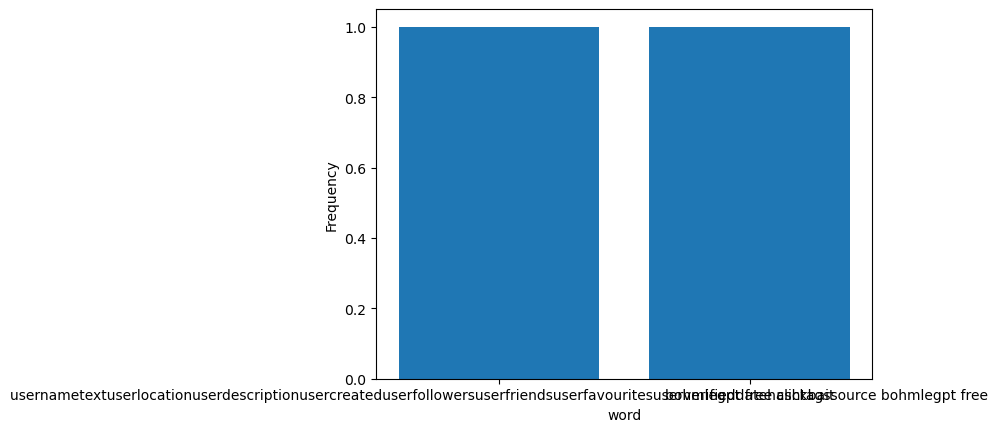

In [124]:
Frequency(tF1)

In [126]:
# Word Cloud

In [367]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import seaborn as sns

In [127]:
pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.8/222.8 kB 861.7 kB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for wordcloud: filename=wordcloud-1.9.1.1-cp39-cp39-macosx_11_0_arm64.whl size=153083 sha256=e2512b470a77d1184e18593bb05d1adba90481a7b6d5306a8e230dcc4d50b17a
  Stored in directory: /Users/student/Library/Caches/pip/wheels/97/4a/4e/ebf8252ba08b46a4d8e4eb21c5594f14dacd808ec1fc4b6eb5
Successfully built wordcloud
Note: you may need to restart the kernel to use updated packages.


In [186]:
#TEXT IN GENERAL

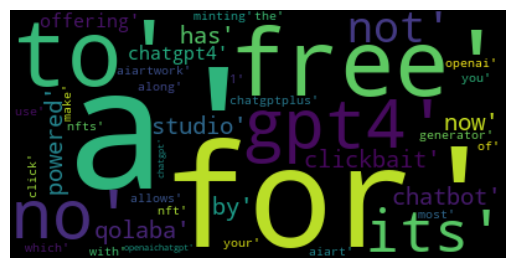

In [187]:
text = df.text[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [188]:
#CLEAN_TEXT

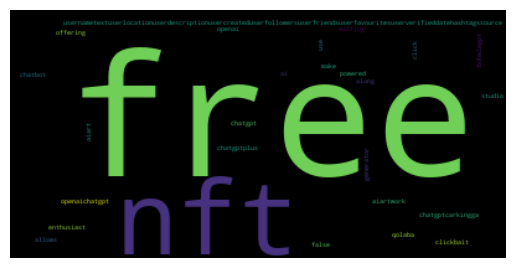

In [189]:
text1 = clean_data

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text1)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [190]:
all_words_lem = ' '.join([word for word in df['text_string_lem']])

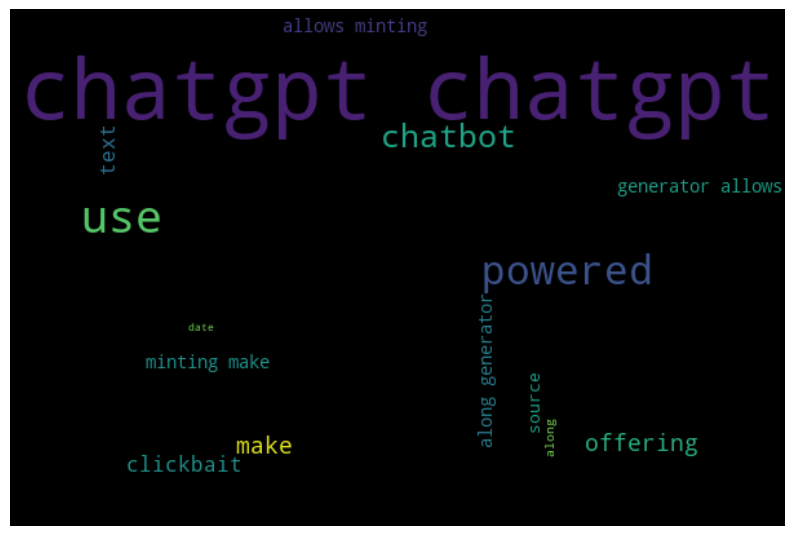

In [191]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100).generate(all_words_lem)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

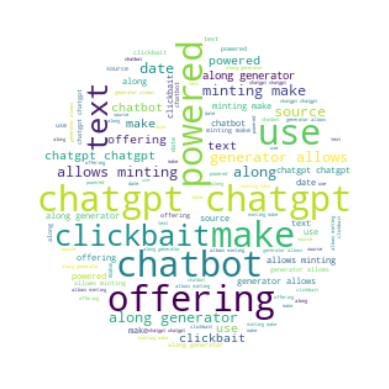

In [192]:
x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc = WordCloud(background_color="white", repeat=True, mask=mask)
wc.generate(all_words_lem)

plt.axis("off")
plt.imshow(wc, interpolation="bilinear");

In [194]:
#Displaying Most Common Words

In [212]:
words = nltk.word_tokenize(all_words_lem)
fd = FreqDist(words)

In [213]:
fd.most_common(3)

[('chatgpt', 610), ('use', 42), ('powered', 32)]

In [214]:
fd.tabulate(3)

chatgpt     use powered 
    610      42      32 


In [215]:
# Obtain top 10 words
top_10 = fd.most_common(10)

# Create pandas series to make plotting easier
fdist = pd.Series(dict(top_10))

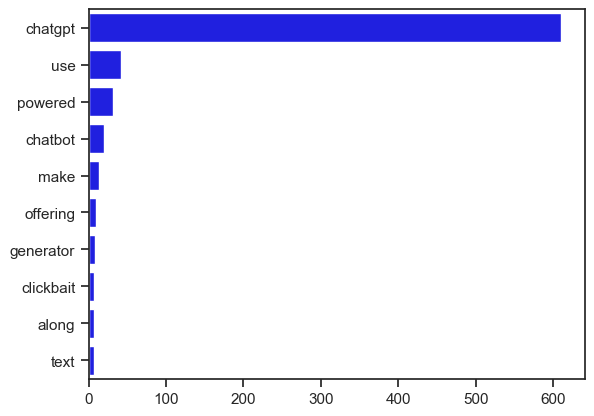

In [216]:
sns.set_theme(style="ticks")

sns.barplot(y=fdist.index, x=fdist.values, color='blue');

In [217]:
# Show frequency of a specific word
fd["use"]

42

### 4. Sentiment Analysis

In [366]:
from textblob import TextBlob
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer

In [295]:
sentiment_scores1 = [TextBlob(text).sentiment.polarity for text in df['text']]

In [296]:
sentiment_scores1


[0.43333333333333335,
 0.0,
 0.0,
 0.11212121212121212,
 -0.0125,
 0.16666666666666666,
 0.0,
 -0.03333333333333333,
 -0.0125,
 0.0,
 -0.0125,
 0.1,
 0.0,
 -0.3,
 -0.0125,
 0.3,
 0.7,
 0.12866666666666665,
 0.0,
 0.3066666666666666,
 0.1,
 0.0,
 0.0,
 -0.01,
 -0.0125,
 0.2,
 0.3181818181818182,
 -0.26923076923076916,
 0.43333333333333335,
 -0.25,
 0.1,
 0.1,
 0.2090909090909091,
 -0.01,
 0.0,
 0.024999999999999994,
 0.4,
 0.125,
 -0.2916666666666667,
 0.1,
 0.0,
 0.3422619047619047,
 0.25,
 0.2,
 0.0,
 0.3181818181818182,
 0.25,
 0.4,
 0.0,
 0.10000000000000003,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.0125,
 0.4681818181818182,
 0.25,
 0.2,
 0.0,
 0.04999999999999999,
 0.31666666666666665,
 0.0,
 -0.05000000000000001,
 -0.06666666666666667,
 0.5,
 -0.07777777777777779,
 -0.0125,
 0.16666666666666669,
 0.0,
 -0.01,
 0.43333333333333335,
 0.22727272727272727,
 0.1,
 0.8,
 -0.09047619047619049,
 0.475,
 0.35,
 0.0,
 0.0,
 0.03333333333333335,
 0.8333333333333334,
 0.0,
 0.5,
 0.43333333333333335,
 0.

In [304]:
def get_sentiment(tweet):
    blob = TextBlob(tweet)
    sentiment = blob.sentiment
    if blob.sentiment.polarity > 0:
        sentiment = 1
    elif blob.sentiment.polarity < 0:
        sentiment  = -1
    else: 
        sentiment = 0
    
    return sentiment


In [305]:

def get_sentiment_polarity(tweet):
    blob = TextBlob(tweet)
    return blob.sentiment.polarity


In [306]:
def get_sentiment_subjectivity(tweet):
    blob = TextBlob(tweet)
    return blob.sentiment.subjectivity

In [308]:
sentiments_tb = df['text'].apply(get_sentiment)
sentiment_pol_tb = df['text'].apply(get_sentiment_polarity)
sentiment_sub_tb = df['text'].apply(get_sentiment_subjectivity)

df['sentiment'] = sentiments_tb

In [309]:
df

,user_name,text,user_description,date,hashtags,source,text_token,text_string,text_string_fdist,text_string_lem,...,polarity,neg,neu,pos,compound,neg,neu,pos,compound,sentiment
0,Bohmle,"['gpt4', 'for', 'free', 'no', 'its', 'not', 'a...",NaN,NaN,NaN,NaN,"[gpt4, free, clickbait, qolaba, studio, chatbo...",gpt4 free clickbait qolaba studio chatbot powe...,clickbait chatbot powered offering use along g...,clickbait chatbot powered offering use along g...,...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1
1,NaN,"['ai', 'enthusiast']",60.0,Twitter Web App,NaN,NaN,"[ai, enthusiast]",enthusiast,,,...,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,Dan Bruno AI,"['chatgpt', 'thinks', 'these', '5', 'crypto', ...","The latest in #ChatGPT, #BARD, #Bing, and othe...",2023-05-17 18:11:03+00:00,"['chatgpt', 'AI', 'openAI']",dlvr.it,"[chatgpt, thinks, 5, crypto, coins, explode, y...",chatgpt thinks crypto coins explode year yahoo...,chatgpt chatgpt,chatgpt chatgpt,...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
3,Georgiana Comsa,"['new', 'jwvance', 's', 'post', 'about', '5', ...","Founder of Silicon Valley PR, award-winning PR...",2023-05-17 18:10:25+00:00,"['startups', 'startup50']",Twitter Web App,"[new, jwvance, post, 5, startups, including, v...",new jwvance post startups including vcinityinc...,chatgpt,chatgpt,...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1
4,Bitone Great,"['ð', 'get', 'out', 'ð', 'ð', 'binance', 'spot...",#ChatGPT (AI) powered Free Trading Signal! \nL...,2023-05-17 18:09:39+00:00,"['Binance', 'Short', 'GHSTUSDT']",rsi1,"[ð, get, ð, ð, binance, spotð, â, recommendati...",get binance spotð recommendation short ticker ...,powered chatgpt,powered chatgpt,...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,O'Dwyer's PR News,"['chatgpt', 'set', 'off', 'an', 'endless', 'st...","The #1 news outlet for public relations, publi...",2023-05-17 16:00:37+00:00,['ChatGPT'],Twitter Web App,"[chatgpt, set, endless, stream, fear, despair,...",chatgpt set endless stream fear despair closer...,chatgpt,chatgpt,...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-1
496,"Tracy Krauss, #author #artist #playwright","['chatgpt', 'is', 'a', 'hot', 'topic', 'there'...",I write modern Christian romance with a twist ...,2023-05-17 16:00:37+00:00,NaN,Hootsuite Inc.,"[chatgpt, hot, topic, doubt, changing, writing...",chatgpt hot topic doubt changing writing publi...,chatgpt chatgpt,chatgpt chatgpt,...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1
497,Tom Solid,"['exciting', 'news', 'chatgpt', 'has', 'launch...",ðâ¨ We help you to build your productivity...,2023-05-17 16:00:30+00:00,['chatGPT'],Hootsuite Inc.,"[exciting, news, chatgpt, launched, plugin, st...",exciting news chatgpt launched plugin store ma...,chatgpt,chatgpt,...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1
498,Tweeting Monk,"['oncrawl', 'agreed', 'the', 'chatgpt', 'is', ...",Set your Twitter account on auto-pilot and wat...,2023-05-17 16:00:28+00:00,['ChatGPT'],TweetingMonk,"[oncrawl, agreed, chatgpt, definitely, superio...",oncrawl agreed chatgpt definitely superior cha...,chatgpt chatbot,chatgpt chatbot,...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1


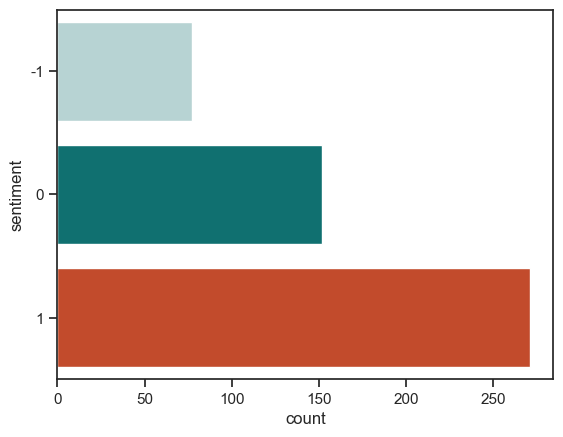

In [310]:
#Visualize data
# Number of tweets 
sns.countplot(y='sentiment', 
             data=df, 
             palette=['#b2d8d8',"#008080", '#db3d13']
             );

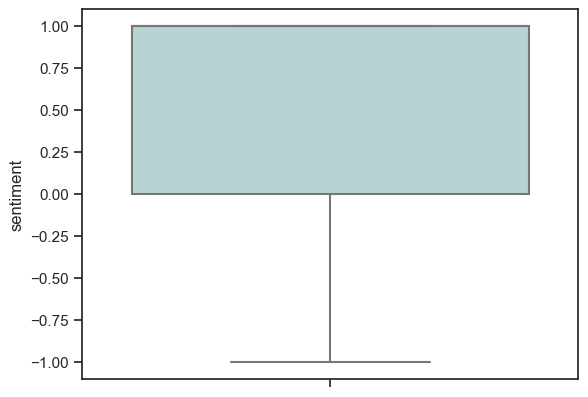

In [318]:
# Boxplot
sns.boxplot(y='sentiment', 
             data=df, 
             palette=['#b2d8d8',"#008080", '#db3d13']
             );

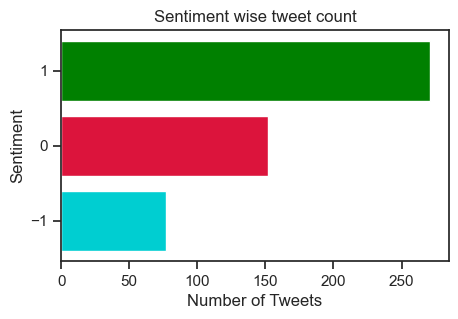

CPU times: user 155 ms, sys: 5.65 ms, total: 160 ms
Wall time: 77.1 ms


In [320]:
%%time
sentiments=df.sentiment.value_counts()

plt.subplots(figsize=(5,3))
plt.barh(sentiments.index,sentiments.values, color=['green','#DC143C','#00CED1','#76EE00','#8B3E2F'])
plt.title("Sentiment wise tweet count")
plt.ylabel('Sentiment')
plt.xlabel('Number of Tweets')
plt.yticks(sentiments.index)
plt.show()

In [218]:
#using VADER

In [219]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/student/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [220]:
analyzer = SentimentIntensityAnalyzer()

In [223]:
df['polarity'] = df['text_string_lem'].apply(lambda x: analyzer.polarity_scores(x))
df.tail(5)

,user_name,text,user_location,user_description,user_verified,date,hashtags,source,text_token,text_string,text_string_fdist,text_string_lem,is_equal,polarity
495,O'Dwyer's PR News,"['chatgpt', 'set', 'off', 'an', 'endless', 'st...","New York, NY","The #1 news outlet for public relations, publi...",False,2023-05-17 16:00:37+00:00,['ChatGPT'],Twitter Web App,"[chatgpt, set, endless, stream, fear, despair,...",chatgpt set endless stream fear despair closer...,chatgpt,chatgpt,True,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
496,"Tracy Krauss, #author #artist #playwright","['chatgpt', 'is', 'a', 'hot', 'topic', 'there'...","British Columbia, Canada",I write modern Christian romance with a twist ...,False,2023-05-17 16:00:37+00:00,NaN,Hootsuite Inc.,"[chatgpt, hot, topic, doubt, changing, writing...",chatgpt hot topic doubt changing writing publi...,chatgpt chatgpt,chatgpt chatgpt,True,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
497,Tom Solid,"['exciting', 'news', 'chatgpt', 'has', 'launch...",Germany,ðâ¨ We help you to build your productivity...,False,2023-05-17 16:00:30+00:00,['chatGPT'],Hootsuite Inc.,"[exciting, news, chatgpt, launched, plugin, st...",exciting news chatgpt launched plugin store ma...,chatgpt,chatgpt,True,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
498,Tweeting Monk,"['oncrawl', 'agreed', 'the', 'chatgpt', 'is', ...",GET 30% OFF FOR 3 MONTHS,Set your Twitter account on auto-pilot and wat...,False,2023-05-17 16:00:28+00:00,['ChatGPT'],TweetingMonk,"[oncrawl, agreed, chatgpt, definitely, superio...",oncrawl agreed chatgpt definitely superior cha...,chatgpt chatbot,chatgpt chatbot,True,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
499,ManTFupTV,"['do', 'you', 'agree', 'whatever', 'is', 'put'...","Fort Lauderdale, FL",ManTFUp Podcast ð\nListen to Season 2 NOW! ...,False,2023-05-17 16:00:26+00:00,NaN,Buffer,"[agree, whatever, put, internet, go, away, wat...",agree whatever put internet away watch full ep...,chatgpt,chatgpt,True,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [229]:
# Change data structure
df = pd.concat(
    [df.drop(['user_location'], axis=1), 
     df['polarity'].apply(pd.Series)], axis=1)
df.head(3)

,user_name,text,user_description,date,hashtags,source,text_token,text_string,text_string_fdist,text_string_lem,is_equal,polarity,neg,neu,pos,compound,neg,neu,pos,compound
0,Bohmle,"['gpt4', 'for', 'free', 'no', 'its', 'not', 'a...",NaN,NaN,NaN,NaN,"[gpt4, free, clickbait, qolaba, studio, chatbo...",gpt4 free clickbait qolaba studio chatbot powe...,clickbait chatbot powered offering use along g...,clickbait chatbot powered offering use along g...,True,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,NaN,"['ai', 'enthusiast']",60.0,Twitter Web App,NaN,NaN,"[ai, enthusiast]",enthusiast,,,True,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Dan Bruno AI,"['chatgpt', 'thinks', 'these', '5', 'crypto', ...","The latest in #ChatGPT, #BARD, #Bing, and othe...",2023-05-17 18:11:03+00:00,"['chatgpt', 'AI', 'openAI']",dlvr.it,"[chatgpt, thinks, 5, crypto, coins, explode, y...",chatgpt thinks crypto coins explode year yahoo...,chatgpt chatgpt,chatgpt chatgpt,True,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [234]:
df.head()

,user_name,text,user_description,date,hashtags,source,text_token,text_string,text_string_fdist,text_string_lem,is_equal,polarity,neg,neu,pos,compound,neg,neu,pos,compound
0,Bohmle,"['gpt4', 'for', 'free', 'no', 'its', 'not', 'a...",NaN,NaN,NaN,NaN,"[gpt4, free, clickbait, qolaba, studio, chatbo...",gpt4 free clickbait qolaba studio chatbot powe...,clickbait chatbot powered offering use along g...,clickbait chatbot powered offering use along g...,True,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,NaN,"['ai', 'enthusiast']",60.0,Twitter Web App,NaN,NaN,"[ai, enthusiast]",enthusiast,,,True,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Dan Bruno AI,"['chatgpt', 'thinks', 'these', '5', 'crypto', ...","The latest in #ChatGPT, #BARD, #Bing, and othe...",2023-05-17 18:11:03+00:00,"['chatgpt', 'AI', 'openAI']",dlvr.it,"[chatgpt, thinks, 5, crypto, coins, explode, y...",chatgpt thinks crypto coins explode year yahoo...,chatgpt chatgpt,chatgpt chatgpt,True,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,Georgiana Comsa,"['new', 'jwvance', 's', 'post', 'about', '5', ...","Founder of Silicon Valley PR, award-winning PR...",2023-05-17 18:10:25+00:00,"['startups', 'startup50']",Twitter Web App,"[new, jwvance, post, 5, startups, including, v...",new jwvance post startups including vcinityinc...,chatgpt,chatgpt,True,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,Bitone Great,"['ð', 'get', 'out', 'ð', 'ð', 'binance', 'spot...",#ChatGPT (AI) powered Free Trading Signal! \nL...,2023-05-17 18:09:39+00:00,"['Binance', 'Short', 'GHSTUSDT']",rsi1,"[ð, get, ð, ð, binance, spotð, â, recommendati...",get binance spotð recommendation short ticker ...,powered chatgpt,powered chatgpt,True,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [373]:
df.head(3)

,user_name,text,user_description,date,hashtags,source,text_token,text_string,text_string_fdist,text_string_lem,...,polarity,neg,neu,pos,compound,neg,neu,pos,compound,sentiment
0,Bohmle,"['gpt4', 'for', 'free', 'no', 'its', 'not', 'a...",NaN,NaN,NaN,NaN,"[gpt4, free, clickbait, qolaba, studio, chatbo...",gpt4 free clickbait qolaba studio chatbot powe...,clickbait chatbot powered offering use along g...,clickbait chatbot powered offering use along g...,...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1
1,NaN,"['ai', 'enthusiast']",60.0,Twitter Web App,NaN,NaN,"[ai, enthusiast]",enthusiast,,,...,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,Dan Bruno AI,"['chatgpt', 'thinks', 'these', '5', 'crypto', ...","The latest in #ChatGPT, #BARD, #Bing, and othe...",2023-05-17 18:11:03+00:00,"['chatgpt', 'AI', 'openAI']",dlvr.it,"[chatgpt, thinks, 5, crypto, coins, explode, y...",chatgpt thinks crypto coins explode year yahoo...,chatgpt chatgpt,chatgpt chatgpt,...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0


### 5. Feature Engineering

In [365]:
from nltk.tag import pos_tag

In [250]:
#Length of Sentence

In [247]:
sentences= nltk.sent_tokenize(clean_data)

length= len(sentences)

length

1

In [ ]:
#No. of Words in Clean Text

In [259]:
words= nltk.word_tokenize(clean_data)

length= len(words)

length

29

In [261]:
#No. of Words in Text

In [262]:
per_word = read_data.split()

In [263]:
print('Total Words:', len(per_word))

Total Words: 49


In [266]:
# return space count

In [267]:
def check_space(string):
     
    # counter
    count = 0
     
    # loop for search each index
    for i in range(0, len(string)):
         
        # Check each char
        # is blank or not
        if string[i] == " ":
            count += 1
         
    return count

 
# call the function and display
print("number of spaces ",check_space(clean_data))

number of spaces  28


In [272]:
#counting char a in text

In [273]:
print(clean_data.count('a'))

30


In [277]:
#number of Verbs

In [279]:
# POS Tagging
tagged_words = pos_tag(df['text'])
print("POS Tagging:", tagged_words)

POS Tagging: [("['gpt4', 'for', 'free', 'no', 'its', 'not', 'a', 'clickbait', 'qolaba', 'studio', 'now', 'has', 'a', 'chatbot', 'powered', 'by', 'chatgpt4', 'offering', 'chatgptplus', 'for', 'free', 'to', 'use', 'along', 'with', 'aiart', 'generator', 'which', 'allows', 'you', 'a', '1', 'click', 'nft', 'minting', 'to', 'make', 'the', 'most', 'of', 'your', 'aiartwork', 'nfts', 'openai', 'openaichatgpt', 'chatgpt']", 'JJ'), ("['ai', 'enthusiast']", 'NNP'), ("['chatgpt', 'thinks', 'these', '5', 'crypto', 'coins', 'will', 'explode', 'this', 'year', 'yahoo', 'finance', 'chatgpt', 'ai', 'openai', 'https', 't', 'co', 'tfodu0qndz']", 'NNP'), ("['new', 'jwvance', 's', 'post', 'about', '5', 'startups', 'including', 'vcinityinc', 'that', 'won', 'the', '1st', 'startup50', 'challenge', 'thx', 'to', 'chatgpt', 'based', 'on', 'answers', 'about', 'macro', 'economic', 'pressures', 'vc', 'funding', 'track', 'record', 'of', 'management', 'team', 'amp', 'growth', 'potential', 'of', 'the', 'market', 'sector

### 6. Vectorization

In [351]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [352]:
#CountVectorizer

In [353]:
def perform_count_vectorization(documents):
    # Create an instance of CountVectorizer
    vectorizer = CountVectorizer()

    # Fit and transform the documents into a document-term matrix
    Tweet_vectors = vectorizer.fit_transform(documents)

    # Get the feature names (words) from the vectorizer
    feature_names = vectorizer.get_feature_names()

    # Create a DataFrame from the document-term matrix
    CountVec = pd.DataFrame(Tweet_vectors.toarray(), columns=feature_names)
    
    return Tweet_vectors



In [ ]:
# Example usage:

text_cv = perform_count_vectorization(clean_data)
print(text_cv)

In [289]:
#TFIDF

In [290]:

def perform_tfidf_vectorization(documents):
    # Create an instance of TfidfVectorizer
    vectorizer = TfidfVectorizer()

    # Fit and transform the documents into a TF-IDF matrix
    Tweet_Vectors = vectorizer.fit_transform(documents)

    # Get the feature names (words) from the vectorizer
    ''' feature_names = vectorizer.get_feature_names()

    # Create a DataFrame from the TF-IDF matrix
    df = pd.DataFrame(Tweet_Vectors.toarray(), columns=feature_names)'''

    return Tweet_Vectors

In [292]:
#DOC2VEC

In [293]:
def perform_doc2vec_embedding(documents):
    # Prepare the tagged documents
    tagged_documents = [TaggedDocument(words=d.split(), tags=[str(i)]) for i, d in enumerate(documents)]

    # Create an instance of Doc2Vec model
    model = Doc2Vec(vector_size=100, min_count=2, epochs=40)

    # Build the vocabulary
    model.build_vocab(tagged_documents)

    # Train the Doc2Vec model
    model.train(tagged_documents, total_examples=model.corpus_count, epochs=model.epochs)

    # Get the document vectors
    vectors = [model.docvecs[str(i)] for i in range(len(documents))]

    return vectors

### 8. Models

In [364]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [360]:
#Dataset split

In [ ]:
#only working with text blob and tfidf atm

print("[TextBlob, TFIDF]\n\n")
#[TextBlob, TFIDF]
train_vectors_TFIDF, test_vecors_TFIDF, train_labels_tb, test_labels_tb = train_test_split(Tweet_TFIDF, sentiments_tb, test_size=0.3, random_state=42)

# Print the shapes of the resulting subsets
print("Training data shape:", train_vectors_TFIDF.shape, train_labels_tb.shape)
print("Testing data shape:", test_vecors_TFIDF.shape, test_labels_tb.shape)


print("\n\n[VADER, TFIDF]\n\n")
#[VADER, TFIDF]
train_vectors_TFIDF, test_vecors_TFIDF, train_labels_vader, test_labels_vader = train_test_split(Tweet_TFIDF, sentiments_vader, test_size=0.3, random_state=42)


# Print the shapes of the resulting subsets
print("Training data shape:", train_vectors_TFIDF.shape, train_labels_vader.shape)
print("Testing data shape:", test_vecors_TFIDF.shape, test_labels_vader.shape)



In [361]:
def train_random_forest(X_train, y_train, X_test):
    # Create a Random Forest classifier
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    
    # Train the classifier
    rf.fit(X_train, y_train)
    
    # Predict the labels for the test data
    y_pred = rf.predict(X_test)
    
    return y_pred

In [362]:
def train_multinomial_nb(X_train, y_train, X_test):
    # Create a Multinomial Naïve Bayes classifier
    nb = MultinomialNB()
    
    # Train the classifier
    nb.fit(X_train, y_train)
    
    # Predict the labels for the test data
    y_pred = nb.predict(X_test)
    
    return y_pred

In [ ]:
#RNN

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM
from keras.utils import np_utils

# Preprocessing
tokens = nltk.word_tokenize(read_data)
tokens = [word.lower() for word in tokens if word.isalpha()]

# Build Markov chain
def build_markov_chain(tokens):
    chain = {}
    for i in range(len(tokens)-1):
        if tokens[i] in chain:
            chain[tokens[i]].append(tokens[i+1])
        else:
            chain[tokens[i]] = [tokens[i+1]]
    return chain

markov_chain = build_markov_chain(tokens)

# Encoding
word_set = sorted(list(set(tokens)))
word_to_int = dict((c, i) for i, c in enumerate(word_set))
int_to_word = dict((i, c) for i, c in enumerate(word_set))

n_words = len(tokens)
n_vocab = len(word_set)
seq_length = 3

dataX = []
dataY = []
for i in range(0, n_words - seq_length):
    seq_in = tokens[i:i + seq_length]
    seq_out = tokens[i + seq_length]
    dataX.append([word_to_int[word] for word in seq_in])
    dataY.append(word_to_int[seq_out])

n_patterns = len(dataX)

# Reshape data
X = np.reshape(dataX, (n_patterns, seq_length, 1))
# Normalize
X = X / float(n_vocab)
# One-hot encode the output variable
y = np_utils.to_categorical(dataY)

# Build the model
model = Sequential()
model.add(LSTM(256, input_shape=(X.shape[1], X.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(y.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')

# Train the model
model.fit(X, y, epochs=100, batch_size=128)

# Generate text
start = np.random.randint(0, len(dataX)-1)
pattern = dataX[start]
print("Seed:")
print("\"", ' '.join([int_to_word[value] for value in pattern]), "\"")
# generate words
for i in range(10):
    x = np.reshape(pattern, (1, len(pattern), 1))
    x = x / float(n_vocab)
    prediction = model.predict(x, verbose=0)
    index = np.argmax(prediction)
    result = int_to_word[index]
    seq_in = [int_to_word[value] for value in pattern]
    print(result)
    pattern.append(index)
    pattern = pattern[1:len(pattern)]

In [ ]:
# Multinomial Naïve Bayes
nb_pred = train_multinomial_nb(train_vectors_TFIDF, train_labels_tb, test_vecors_TFIDF)
nb_acc = accuracy_score(test_labels_tb, nb_pred)
print("Multinomial Naïve Bayes Accuracy:", nb_acc)
nb_pre = precision_score(test_labels_tb, nb_pred, average='macro')
print("Multinomial Naïve Bayes Precision: ", nb_pre)
nb_re = recall_score(test_labels_tb, nb_pred, average='macro')
print("Multinomial Naïve Bayes Recall: ", nb_re)
nb_f1 = f1_score(test_labels_tb, nb_pred, average='macro')
print("Multinomial Naïve Bayes F1 Score: ", nb_f1)

In [ ]:
# Random Forest
rf_pred = train_random_forest(train_vectors_TFIDF, train_labels_tb, test_vecors_TFIDF)
rf_acc = accuracy_score(test_labels_tb, rf_pred)
print("Random Forest Accuracy:", rf_acc)
rf_pre = precision_score(test_labels_tb, rf_pred, average='macro')
print("Random Forest Precision: ", rf_pre)
rf_re = recall_score(test_labels_tb, rf_pred, average='macro')
print("Random Forest Recall: ", rf_re)
rf_f1 = f1_score(test_labels_tb, rf_pred, average='macro')
print("Random Forest F1 Score: ", rf_f1)

In [ ]:
# bar chart of evaluation metrics for each model
labels = ['Accuracy', 'Precision', 'Recall', 'F-measure']
nb_values = nb_eval_metrics[:4]
lr_values = lr_eval_metrics[:4]
svm_values = svm_eval_metrics[:4]
rf_values = rf_eval_metrics[:4]
x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, nb_values, width, label='Naive Bayes')
rects2 = ax.bar(x, lr_values, width, label='Logistic Regression')
rects3 = ax.bar(x + width, svm_values, width, label='SVM')
rects4 = ax.bar(x + 2*width, rf_values, width, label='Random Forest')

# Adding some text for labels
ax.set_ylabel('Evaluation Metrics')
ax.set_title('Evaluation Metrics of Different Models')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Adding the data labels to the bar chart
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

fig.tight_layout()

plt.show()
